# Employee Attrition Prediction

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Etape 1 : Chargement et importation du dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Noms des colonnes 
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
# forme 
df.shape

(1470, 35)

In [5]:
# informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# Valeurs manquantes 
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Etape 2 :  Exploratory Data Analysis

In [7]:
# Statistiques descriptives 
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Etude des distributions

<Axes: xlabel='Age', ylabel='Count'>

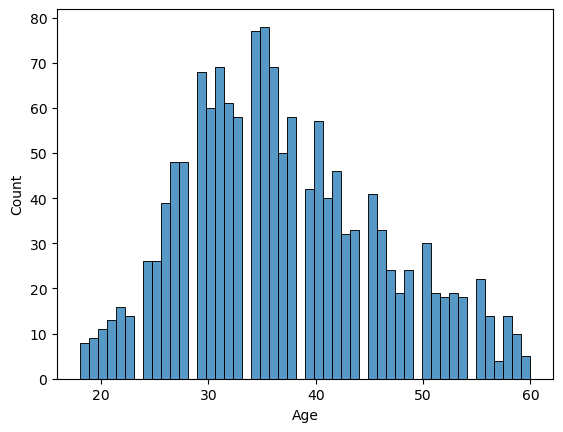

In [8]:
# Age
sns.histplot(df['Age'], bins=50)

**La plupart des emloyées ont entre 30 et 40 ans**

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

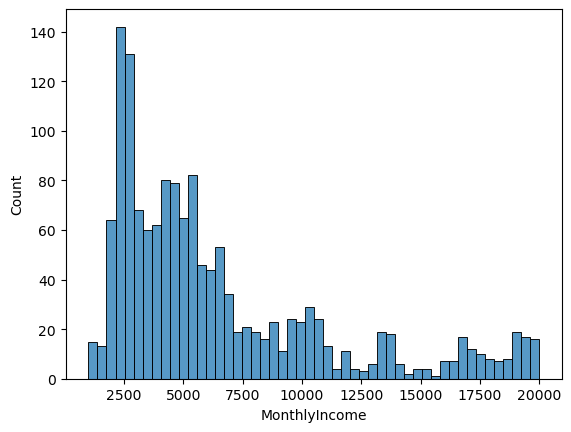

In [9]:
# Monthly Income
sns.histplot(df['MonthlyIncome'], bins=50)

**Beaucoup d'employé sont payés 2500$**

<Axes: xlabel='DailyRate', ylabel='Count'>

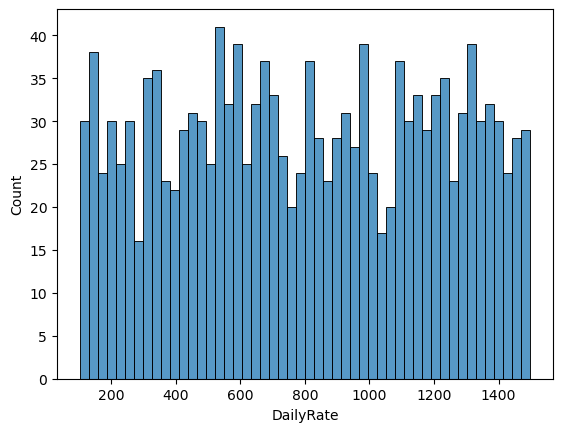

In [10]:
# Daily rate
sns.histplot(df['DailyRate'], bins=50)

<Axes: xlabel='HourlyRate', ylabel='Count'>

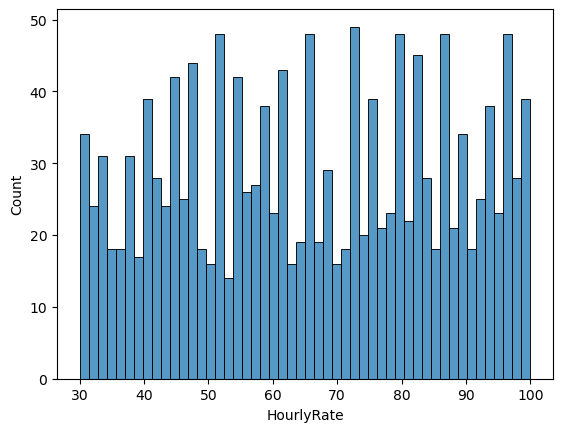

In [11]:
# Hourly Rate 
sns.histplot(df['HourlyRate'], bins=50)

<Axes: xlabel='YearsAtCompany', ylabel='Count'>

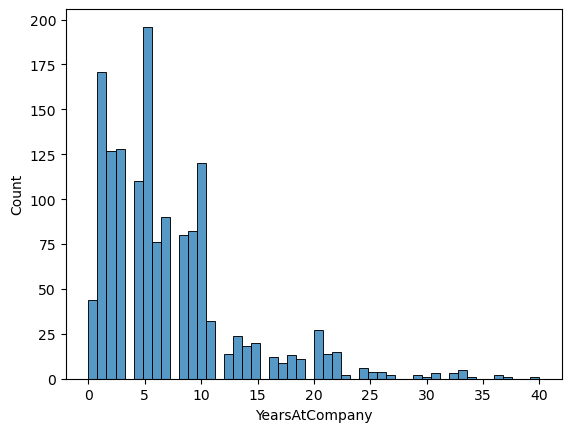

In [12]:
# Years at Company
sns.histplot(df['YearsAtCompany'], bins=50)

<Axes: xlabel='JobSatisfaction', ylabel='Count'>

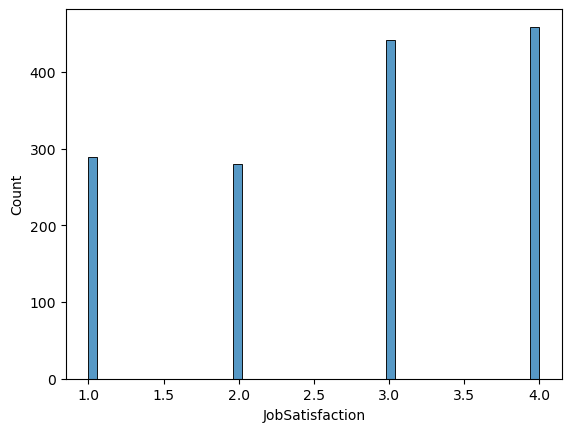

In [13]:
# JobSatisfaction
sns.histplot(df['JobSatisfaction'], bins=50)

**La majorité est satisfait de son emploi**

<Axes: xlabel='Gender', ylabel='MonthlyIncome'>

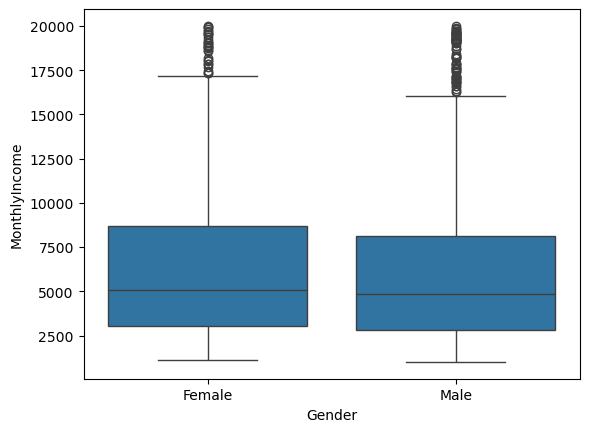

In [14]:
# Visualisation de la répartition de quelques données
sns.boxplot(x = df['Gender'], y = df['MonthlyIncome'])

**Disons que la plupart des employés sont rénumérés entre 2500 et 8000 dollars par mois** 

<Axes: xlabel='Age', ylabel='JobRole'>

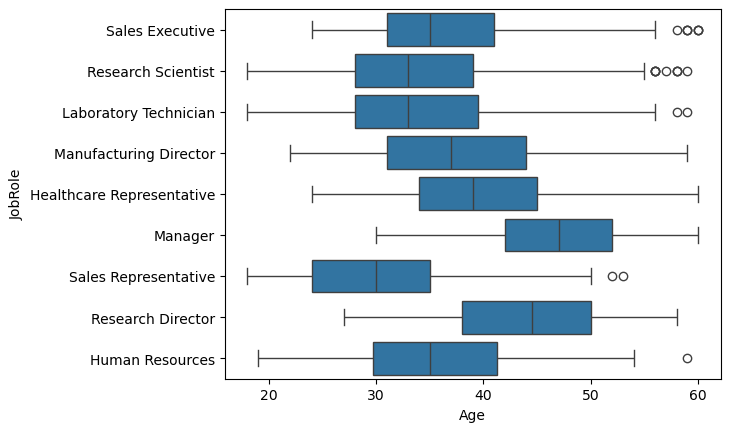

In [15]:
sns.boxplot(y = df['JobRole'], x = df['Age'])

****Manager and Research Director** sont les deux postes avec les employés les plus âgés (sûrement les plus expérimenté)**

<Axes: xlabel='Attrition', ylabel='OverTime'>

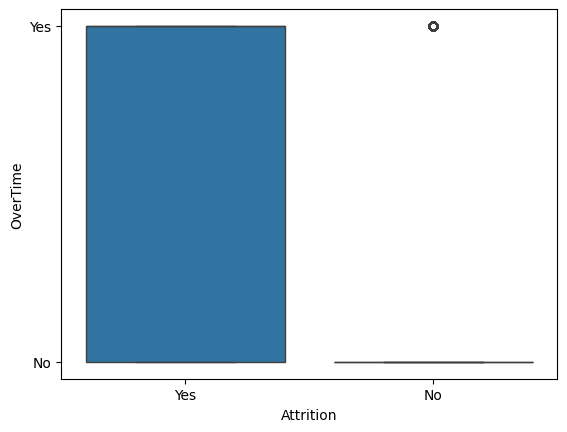

In [16]:
sns.boxplot(x = df['Attrition'], y = df['OverTime'])

**L'une des causes(ou la cause) principale du départ des employés est faire des heures supplémentaires**

In [17]:
# Corrélations
df_num = df.select_dtypes(exclude=object)
df_num.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


**Les constantes sont à supprimer pour afficher la matrice de corrélation**

In [18]:
df_num.drop(['EmployeeCount', 'StandardHours'], axis=1, inplace=True)

<Axes: >

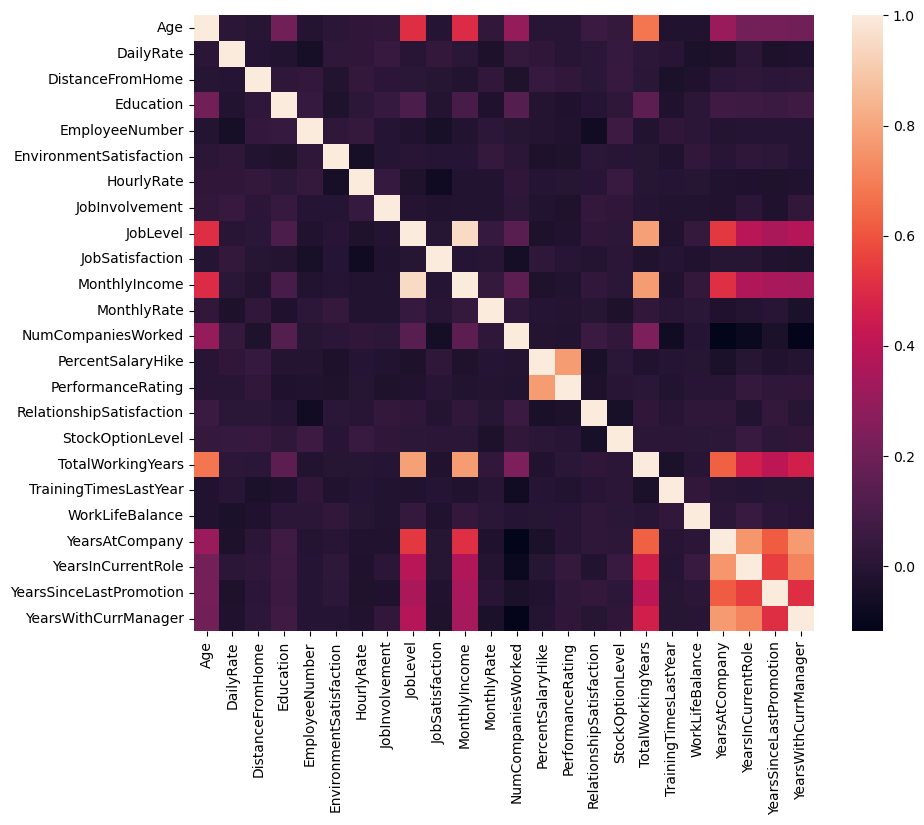

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df_num.corr())

### 2. Preprocessing 

In [20]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder

In [21]:
x = df.drop('Attrition', axis=1)
y = df['Attrition']
num_features = make_column_selector(dtype_exclude=object)
cat_features = make_column_selector(dtype_include=object)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ]
)       

In [22]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [23]:
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, GridSearchCV
x = df.drop('Attrition', axis=1)
y = df['Attrition']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

### 3. Modélisation

In [26]:
# Nous testerons deux modèles 
# 1. Regression logistique 
logistic_model = Pipeline([
    ('preprocessor', preprocessor),
    ('logistic', LogisticRegression())
])

In [27]:
# 2. Random Forest
rf_model = Pipeline([
    ('preprocesor', preprocessor),
    ('rf', RandomForestClassifier(n_estimators=100,
                                  max_depth=8,
                                  min_samples_split=7,
                                  min_samples_leaf=5,
                                  n_jobs=-1))])

In [28]:
logistic_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023F2EEBFA10>),
                                                 ('cat', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023F2F008CD0>)])),
                ('logistic', LogisticRegression())])

In [29]:
# Evaluation de sa performance sur les mêmes données d'entraînements
logistic_model.score(x_train, y_train)

0.8883847549909256

In [30]:
# Evaluation plus poussée
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
cross_val_score(logistic_model, x_train, y_train, cv = cv).mean()

np.float64(0.874771698889346)

In [31]:
rf_model.fit(x_train, y_train)

Pipeline(steps=[('preprocesor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023F2EEBFA10>),
                                                 ('cat', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023F2F008CD0>)])),
                ('rf',
                 RandomForestClassifier(max_depth=8, min_samples_leaf=5,
                                        min_samples_split=7, n_jobs=-1))])

In [32]:
rf_model.score(x_train, y_train)

0.8983666061705989

In [33]:
# Evaluation poussée
cross_val_score(rf_model, x_train, y_train, cv=cv).mean()

np.float64(0.8530028794734676)

In [34]:
# Comparaison des performances 
from sklearn.metrics import *
# 1. Logistique
y_pred = logistic_model.predict(x_test)
accuracy_1 = round(accuracy_score(y_test, y_pred),2)
precision_1 = round(precision_score(y_test, y_pred, pos_label='Yes'),2)
recall_1 = round(recall_score(y_test, y_pred, pos_label='Yes'),2)
f_1_score_1 = round(f1_score(y_test, y_pred, pos_label='Yes'),2)


# 2. Random Forest
y_pred_2 = rf_model.predict(x_test)
accuracy_2 = round(accuracy_score(y_test, y_pred_2),2)
precision_2 = round(precision_score(y_test, y_pred_2, pos_label='Yes'),2)
recall_2 = round(recall_score(y_test, y_pred_2, pos_label='Yes'),2)
f_1_score_2 = round(f1_score(y_test, y_pred_2, pos_label='Yes'),2)

In [35]:
print("Régression logistique ")
print(f"Accuracy = {accuracy_1}")
print(f"Precision = {precision_1}")
print(f"Recall = {recall_1}")
print(f"F1_ = {f_1_score_1}")
print("Random Forest")
print(f"Accuracy = {accuracy_2}")
print(f"Precision = {precision_2}")
print(f"Recall = {recall_2}")
print(f"F1_ = {f_1_score_2}")

Régression logistique 
Accuracy = 0.89
Precision = 0.64
Recall = 0.44
F1_ = 0.52
Random Forest
Accuracy = 0.87
Precision = 0.5
Recall = 0.06
F1_ = 0.11


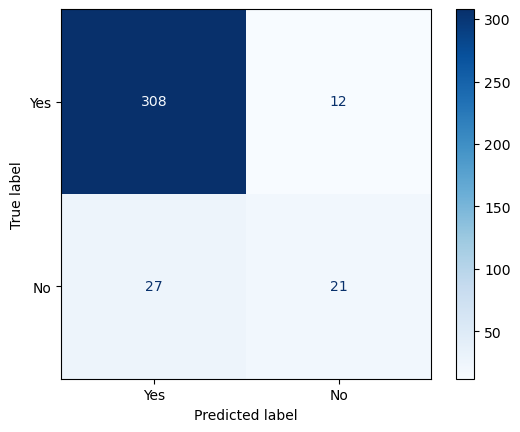

In [36]:
# Matrice de confusion
# Régression Logistique
cm_1 = confusion_matrix(y_test, y_pred)
cm_disp_1 = ConfusionMatrixDisplay(
    cm_1, display_labels=['Yes', 'No']
)
cm_disp_1.plot(cmap='Blues')

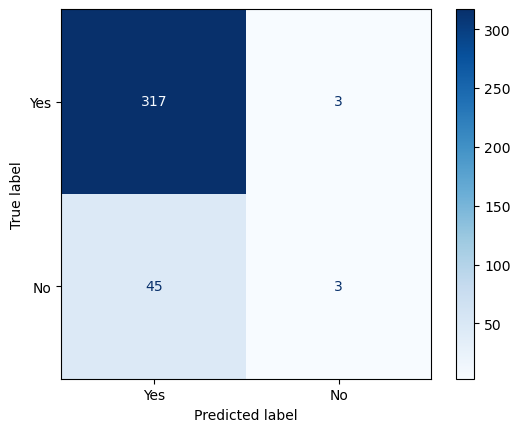

In [37]:
# Random Forest
cm_2 = confusion_matrix(y_test, y_pred_2)
cm_disp_2 = ConfusionMatrixDisplay(
    cm_2, display_labels=['Yes', 'No']
)
cm_disp_2.plot(cmap='Blues')

### 4. Optimisation

In [38]:
# Trouvons les meilleures hyperparamètres pour nos modèles 
log_param = {
    'logistic__C' : [0.01, 0.1, 1, 10, 100],
    'logistic__max_iter' : [500, 1000, 1500, 2000]
}
rf_param = {
    'rf__n_estimators' : [50, 100, 150],
    'rf__max_depth' : [5, 6, 7, 8],
    'rf__min_samples_split' : [8, 9, 10, 11],
    'rf__min_samples_leaf' : [4, 5, 6, 7],
    'rf__n_jobs' : [-1]
}


In [39]:
log_grid = GridSearchCV(logistic_model, param_grid=log_param, cv=cv)
rf_grid = GridSearchCV(rf_model, param_grid=rf_param, cv=cv)

In [40]:
log_grid.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         RobustScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000023F2EEBFA10>),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000023F2F008CD0>)])),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.01, 0.1, 1, 10, 100],
                         'logistic__max_iter': [500, 1000, 1500, 2000]})

In [41]:
log_grid.best_params_

{'logistic__C': 0.1, 'logistic__max_iter': 500}

In [42]:
rf_grid.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocesor',
                                        ColumnTransformer(transformers=[('num',
                                                                         RobustScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000023F2EEBFA10>),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000023F2F008CD0>)])),
                                       ('rf',
                                        RandomForestClassifier(max_depth=8,
                                                               min_samples_leaf=5,
                                                               min_samples_split=7,
                                                               n_jobs=-1))]),
             param_grid={'rf__max_depth': [5, 6, 7, 8],
                         'rf__min_samples_leaf': [4, 5, 6, 7],
                         'rf__min_samples_split': [8, 9, 10, 11],
                         'rf__n_estimators': [50, 100, 150],
                         'rf__n_jobs': [-1]})

In [43]:
rf_grid.best_params_

{'rf__max_depth': 7,
 'rf__min_samples_leaf': 4,
 'rf__min_samples_split': 10,
 'rf__n_estimators': 50,
 'rf__n_jobs': -1}

In [44]:
# Nous pouvons réevaluer les performances
y_pred = log_grid.predict(x_test)
accuracy_1 = round(accuracy_score(y_test, y_pred),2)
precision_1 = round(precision_score(y_test, y_pred, pos_label='Yes'),2)
recall_1 = round(recall_score(y_test, y_pred, pos_label='Yes'),2)
f_1_score_1 = round(f1_score(y_test, y_pred, pos_label='Yes'),2)


# 2. Random Forest
y_pred_2 = rf_grid.predict(x_test)
accuracy_2 = round(accuracy_score(y_test, y_pred_2),2)
precision_2 = round(precision_score(y_test, y_pred_2, pos_label='Yes'),2)
recall_2 = round(recall_score(y_test, y_pred_2, pos_label='Yes'),2)
f_1_score_2 = round(f1_score(y_test, y_pred_2, pos_label='Yes'),2)

In [45]:
print("Régression logistique ")
print(f"Accuracy = {accuracy_1}")
print(f"Precision = {precision_1}")
print(f"Recall = {recall_1}")
print(f"F1_ = {f_1_score_1}")
print("Random Forest")
print(f"Accuracy = {accuracy_2}")
print(f"Precision = {precision_2}")
print(f"Recall = {recall_2}")
print(f"F1_ = {f_1_score_2}")


Régression logistique 
Accuracy = 0.9
Precision = 0.82
Recall = 0.29
F1_ = 0.43
Random Forest
Accuracy = 0.87
Precision = 0.5
Recall = 0.04
F1_ = 0.08


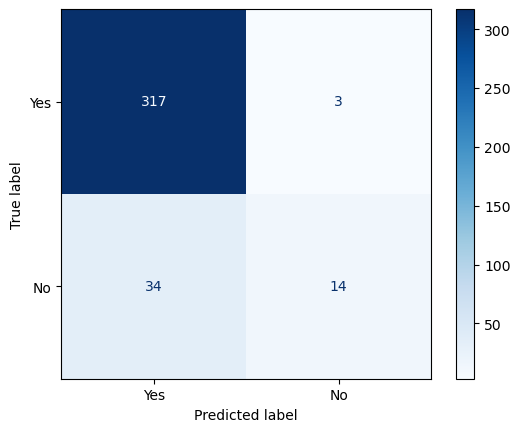

In [46]:
# Nouvelles matrices de confusions
# Régression Logistique
cm_1 = confusion_matrix(y_test, y_pred)
cm_disp_1 = ConfusionMatrixDisplay(
    cm_1, display_labels=['Yes', 'No']
)
cm_disp_1.plot(cmap='Blues')

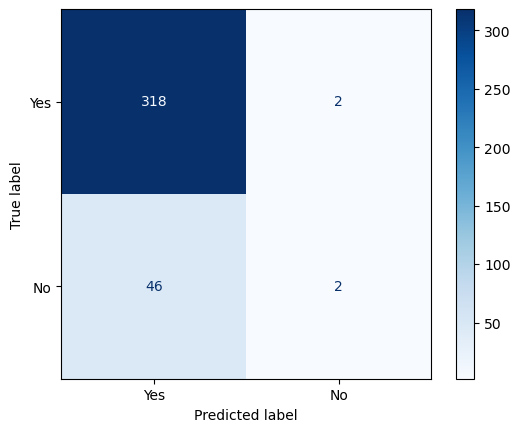

In [47]:
# Régressio
cm_1 = confusion_matrix(y_test, y_pred_2)
cm_disp_1 = ConfusionMatrixDisplay(
    cm_1, display_labels=['Yes', 'No']
)
cm_disp_1.plot(cmap='Blues')